In [3]:
# import pandas and dataframe from pandas package
import pandas as pd
from pandas import DataFrame as df


In [4]:
movies_df = pd.read_csv('movies.csv') 
# now that we have a DataFrame now lets peek into the data 
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# how many movies are there
len(movies_df.index)

9742

In [6]:
# we can also get high level info about the width and height of the data
movies_df.shape

(9742, 3)

In [7]:
# now we can access element position using loc [x_pos][y_pos] syntax
print (movies_df.loc[0][0])
print (movies_df.loc[0][1])
print (movies_df.loc[0][2])

1
Toy Story (1995)
Adventure|Animation|Children|Comedy|Fantasy


In [8]:
# now lets find masala movies which has Action, Comedy, Thriller and Romance
movies_df['genres_arr'] = movies_df['genres'].str.split('|')
movies_df.head()

,movieId,title,genres,genres_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [9]:
masala_lambda = lambda x: set(['Romance', 'Comedy', 'Action', 'Thriller']).issubset(x)
masala_movies = movies_df[movies_df.genres_arr.map(masala_lambda)]
print ('# of masala movies', len(masala_movies.index))
masala_movies

# of masala movies 6


,movieId,title,genres,genres_arr
337,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
1856,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
3460,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...,"[Action, Animation, Comedy, Crime, Drama, Roma..."
3608,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,"[Action, Adventure, Comedy, Drama, Romance, Th..."
4445,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
5774,31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller,"[Action, Adventure, Comedy, Crime, Romance, Th..."


In [10]:
# now adding another column to the dataframe to count the number of genres for each movie
counter_lambda = lambda x: len(x) 
movies_df['genre_count'] = movies_df.genres_arr.apply(counter_lambda)
movies_df.head()

,movieId,title,genres,genres_arr,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1


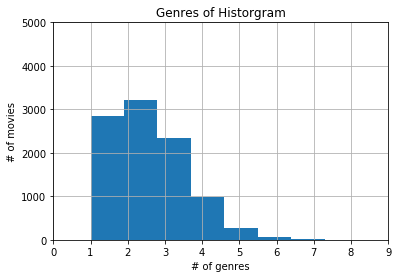

In [18]:
# now lets analyze how many genres do various movies have by plotting a histogram  of genres using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(movies_df.genre_count)
plt.title('Genres of Historgram')
plt.xlabel('# of genres')
plt.ylabel('# of movies')
plt.axis([0, 9, 0, 5000])
plt.grid()
plt.show()


In [19]:
# now lets see how many movies are there in each genre
from collections import Counter
flattened_genres = [item for sublist in movies_df.genres_arr for item in sublist]
genre_dict = dict(Counter(flattened_genres))
print (genre_dict)

{'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Fantasy': 779, 'Romance': 1596, 'Drama': 4361, 'Action': 1828, 'Crime': 1199, 'Thriller': 1894, 'Horror': 978, 'Mystery': 573, 'Sci-Fi': 980, 'War': 382, 'Musical': 334, 'Documentary': 440, 'IMAX': 158, 'Western': 167, 'Film-Noir': 87, '(no genres listed)': 34}


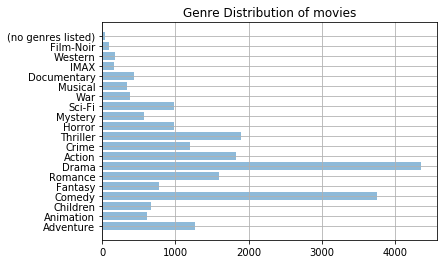

In [20]:
# now lets plot the genre distribution on a horizontal bar chart

y = genre_dict.keys()

plt.barh(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)'], [1263, 611, 664, 3756, 779, 1596, 4361, 1828, 1199, 1894, 978, 573, 980, 382, 334, 440, 158, 167, 87, 34], align='center', alpha=0.5)
plt.grid(True)
plt.title('Genre Distribution of movies')
plt.show()


In [21]:
# now lets move to the movie rating data
ratings_df = pd.read_csv('ratings.csv') 
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
# how are many ratings do we have 
print ('# ratings', len(ratings_df.index)) 

# how many different movies have been rated
print ('# movies', len(ratings_df.movieId.unique()))
       
# what are the different ratings given by the users
print ('# rating values', ratings_df.rating.unique())

# ratings 100836
# movies 9724
# rating values [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


In [23]:
# introducing the numpy package to find the various stat out of data
import numpy as np

# lets find the average rating using the numpy mean function
np.mean(ratings_df.rating)

3.501556983616962

In [24]:
# lets find the median rating
np.median(ratings_df.rating)

3.5

In [25]:
# lets find the 30th percentile rating
np.percentile(ratings_df.rating, 30)

3.0

In [26]:
# the most common rating given by users to movies
from scipy import stats
stats.mode(ratings_df.rating)

ModeResult(mode=array([4.]), count=array([26818]))

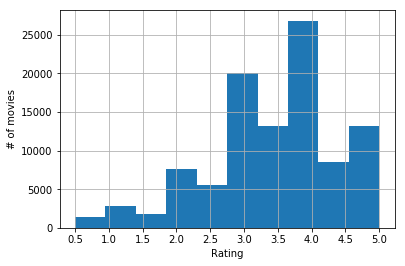

In [28]:
# plotting a histogram of movie rating to get the overall picture
plt.hist(ratings_df.rating)
plt.xticks([4, 5, 3, 2, 1, 4.5, 3.5, 2.5, 0.5, 1.5])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

In [29]:
# now lets find the highest rated movies (highest average ratings)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [34]:
ratings_view = ratings_df[['movieId', 'rating']]
ratings_view.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
7638,88448,5.0
8089,100556,5.0
9065,143031,5.0
9076,143511,5.0
9078,143559,5.0
4245,6201,5.0
8136,102217,5.0
8130,102084,5.0
4240,6192,5.0
9104,145994,5.0


In [43]:
# now lets merge the movies_df with the ratings_df to show the actual titles of the top ten movies
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr,genre_count
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5


In [44]:
# now lets find the titles of the top ten movies to add to our watchlist 
title_df = merged_df[['movieId', 'title', 'rating']] 
title_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)


,movieId,title,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),5.0
8089,100556,"Act of Killing, The (2012)",5.0
9065,143031,Jump In! (2007),5.0
9076,143511,Human (2015),5.0
9078,143559,L.A. Slasher (2015),5.0
4245,6201,Lady Jane (1986),5.0
8136,102217,Bill Hicks: Revelations (1993),5.0
8130,102084,Justice League: Doom (2012),5.0
4240,6192,Open Hearts (Elsker dig for evigt) (2002),5.0
9104,145994,Formula of Love (1984),5.0


In [46]:
# lets check how many ratings have these movies received , take for example movieId 88448
len(merged_df[merged_df['movieId'] == 88448].index)

1

In [47]:
# now lets consider only the movies with atleast 100 ratings
temp_df = title_df.groupby(['movieId', 'title'], as_index=False).count()
well_rated_df = temp_df[temp_df['rating'] > 100].sort_values(by='rating', ascending=False)
well_rated_df.head()

,movieId,title,rating
314,356,Forrest Gump (1994),329
277,318,"Shawshank Redemption, The (1994)",317
257,296,Pulp Fiction (1994),307
510,593,"Silence of the Lambs, The (1991)",279
1938,2571,"Matrix, The (1999)",278


In [52]:
# now lets create a filtered df from merge_df which only have these movies and then find the top 20 movies
filtered_df = merged_df[merged_df['movieId'].apply(lambda x: x in list (well_rated_df['movieId']))]
titles_df = filtered_df[['title', 'rating', 'movieId']]
title_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(20)

,movieId,title,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),5.0
8089,100556,"Act of Killing, The (2012)",5.0
9065,143031,Jump In! (2007),5.0
9076,143511,Human (2015),5.0
9078,143559,L.A. Slasher (2015),5.0
4245,6201,Lady Jane (1986),5.0
8136,102217,Bill Hicks: Revelations (1993),5.0
8130,102084,Justice League: Doom (2012),5.0
4240,6192,Open Hearts (Elsker dig for evigt) (2002),5.0
9104,145994,Formula of Love (1984),5.0


In [54]:
# lets analysze number of ratings that have varied over the years and try to predict how many ratings
# we will get in the coming years

In [53]:
# now lets add a column called the rating_year which depicts the year when the rating was giving
import datetime
year_lambda = lambda x: int(datetime.datetime.fromtimestamp(x).strftime('%Y'))
merged_df['rating_year'] = merged_df['timestamp'].apply(year_lambda)
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr,genre_count,rating_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2000
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,1996
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2005
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2017
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2011


In [55]:
# now lets create a new dataframe which contains number of ratings given on each year
ratings_per_year = merged_df.groupby(['rating_year'])['rating_year'].count()
ratings_per_year.head()

rating_year
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
Name: rating_year, dtype: int64

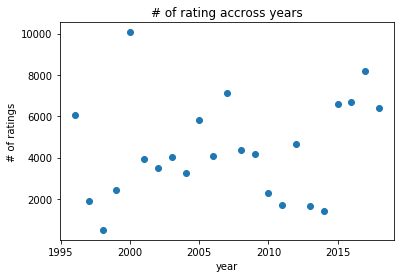

In [56]:
# now lets scatter plot to know how ratings are spread accross years
years = ratings_per_year.keys()
num_ratings = ratings_per_year.get_values()

plt.scatter(years, num_ratings)
plt.title('# of rating accross years')
plt.xlabel('year')
plt.ylabel('# of ratings')
plt.show()

In [58]:
# now lets build a linear regression model using which we will predict the future
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(years, num_ratings)

In [59]:
print('Generated linear model is y = ' + str(slope) + ' * x + ' + str(intercept) )

Generated linear model is y = 72.03359683794464 * x + -140187.2549407114


In [61]:
# now lets use the slope and intercept to create a predict function for the num_ratings in a yeardd
def predict_num_ratings(year):
    return  slope * year + intercept

predicted_ratings = predict_num_ratings(years)

print (predicted_ratings)



Float64Index([3591.8043478261097,  3663.837944664061, 3735.8715415019833,
              3807.9051383399346,  3879.938735177886, 3951.9723320158373,
              4024.0059288537886,  4096.039525691711,  4168.073122529662,
               4240.106719367614,  4312.140316205565,  4384.173913043487,
               4456.207509881438,   4528.24110671939,  4600.274703557341,
              4672.3083003952925,  4744.341897233215,  4816.375494071166,
               4888.409090909117,  4960.442687747069,  5032.476284584991,
               5104.509881422942,  5176.543478260894],
             dtype='float64', name='rating_year')


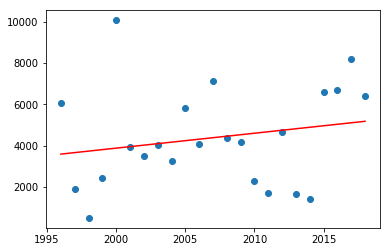

In [62]:
# now lets plot our predicted data along side the actual data to see how well it fits

plt.scatter(years, num_ratings)
plt.plot(years, predicted_ratings, c='r')
plt.show()

In [64]:
# now lets see how good our prediction is by calculating the r-squared value
# r-squared varies from 0 to 1, the closer to 1 the better the model
r_square = r_value ** 2
print ('Linear Model r_square value', r_square)

Linear Model r_square value 0.04079921006568494


In [65]:
# thats a poor model, therefore Linear Regression is not a good choice for this data


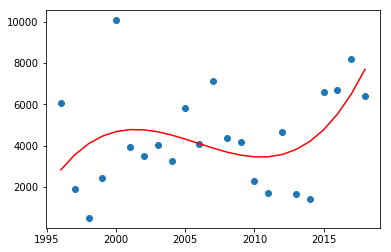

In [68]:
# now lets try a polynomial model to see how it fits
polynomial = np.poly1d(np.polyfit(years, num_ratings, 3))
plt.scatter(years, num_ratings)
plt.plot(years, polynomial(years), c='r')
plt.show()

In [69]:
# now lets calculate the r-square for this polynomial regression
from sklearn.metrics import r2_score
r2 =  r2_score(num_ratings, polynomial(years))
print ('Polynomial Model r_square value', r2)

Polynomial Model r_square value 0.19199600050875498


In [70]:
# much better model compare to the linear model
# now we can predict how many ratings we expect in any year using our polynomial function
print (polynomial(2017))
print (polynomial (2018))

6486.276405334473
7690.402008056641
